In [ ]:
#  用scipy解微分方程  solving a differential equation numerically
#  dy / dt = f(t, y)
#  y(t0) = y0           解这个模板--->导热方程
import scipy
import matplotlib.pyplot as plt
import numpy as np
def f(t, y):  #  t必须在第一个，文档就是这样
    return -0.2*y

t_range = (0, 5)
T0 = np.array([50.])  #  初始值必须是一维numpy array

def true_solution(t):  #  已经知道解，对照用的
    return 50.*np.exp(-0.2*t)

sol = scipy.integrate.solve_ivp(f, t_range, T0, max_step=0.1)
t_vals = sol.t  #  这里t和y是前边定义函数里的t和y
T_vals = sol.y[0, :]  #  以后定义什么函数，这里是什么t和y

fig, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True)
ax1.plot(t_vals, T_vals)
ax1.set_xlabel("$t$")
ax1.set_ylabel("$T$")
ax1.set_title("Solution of the cooling equation")
err = np.abs(T_vals - true_solution(t_vals))
ax2.semilogy(t_vals, err)
ax2.set_xlabel("$t$")
ax2.set_ylabel("Error")
ax2.set_title("Error in approximation")

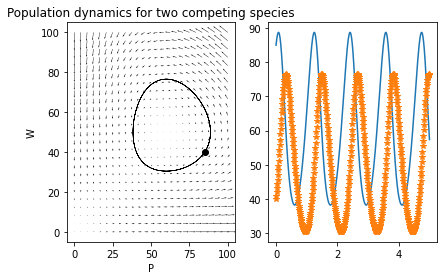

In [20]:
#  解ODE方程组，sympy解不了的那个ap math课本98页  捕食者猎物的方程组
import scipy
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

def predator_prey_system(t, y):
    return np.array([5*y[0] - 0.1*y[0]*y[1], 0.1*y[1]*y[0] -6*y[1]])

p = np.linspace(0, 100, 25)
w = np.linspace(0, 100, 25)
P, W = np.meshgrid(p, w)  #  P是(25,25)的结构  P W是转置矩阵
dp, dw = predator_prey_system(0, np.array([P, W]))  #  初始向量方向 
#  画出向量图
fig, (ax,ax2)= plt.subplots(1, 2, tight_layout=True)

ax.quiver(P, W, dp, dw)  #  dp dw确实是梯度，是变化趋势
ax.set_title("Population dynamics for two competing species")
ax.set_xlabel("P")
ax.set_ylabel("W")

initial_conditions = np.array([85, 40])  #  initial values P(0) = 85 and W(0) = 40
sol = scipy.integrate.solve_ivp(predator_prey_system, (0., 5.),initial_conditions, max_step=0.01)
ax.plot(initial_conditions[0], initial_conditions[1], "ko")
ax.plot(sol.y[0, :], sol.y[1, :], "k", linewidth=0.5)
ax2.plot(sol.t,sol.y[0,:])
ax2.plot(sol.t,sol.y[1,:],'*')

(2, 25, 25)